# Comparison to DNAm Age

Comparison of effective rates of aging and age acceleration measurements between our physiological age and the DNA methylation age from (Horvath, 2013). DNAm ages were calculated for the inCHIANTI cohort for the 1998 and 2007 waves of the study (i.e. W0 and W3). The physiological ages were calculated using the random forest model on all available inchianti features.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import csv
import math

In [2]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]

# DNAm data
DNAm_data = np.genfromtxt('InCHIANTI_DNAmAge.csv',delimiter=',')
m_id = DNAm_data[1:,0]
m_age = DNAm_data[1:,2]
m_year = DNAm_data[1:,1]
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 1998 or m_year[i]==98:
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 2007:
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)

# Save w0 data in [id] [Age] [Pred] [Rate] format
save_id = []
save_chrons = []
save_age = []
save_rate = []
for i, mid in enumerate(m_id):
    if m_year[i] == 1998 or m_year[i]==98:
        idx = np.where(inCH_w0_ids==mid)
        save_id.append(mid)
        save_chrons.append(inCH_w0_chrons[idx][0])
        save_age.append(m_age[i])
        save_rate.append(m_age[i]/inCH_w0_chrons[idx][0])
save_list = [save_id, save_chrons, save_age, save_rate]
save_arr = np.vstack(save_list).T
np.savetxt('./Results/inCHIANTI/wave0_inchianti_epigenetic.tsv',save_arr,delimiter='\t')

In [3]:
# Calculate EARS and EAAs for DNAm
rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))

In [4]:
# Calculate averages for the physiological rates
rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

## Comparison of PAR

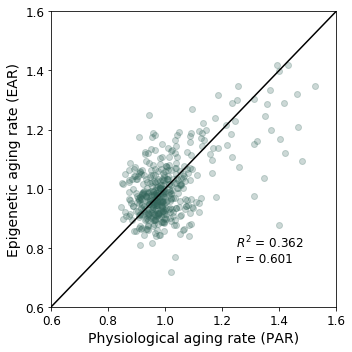

In [6]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.6,1.6],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.6,1.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate.png', dpi=800)
pl.show()

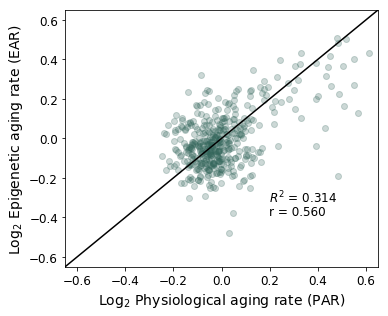

In [7]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(np.log2(m_eRA), np.log2(phys_eRA))
pl.figure(figsize=(5.5,4.5))
pl.scatter(np.log2(phys_eRA),np.log2(m_eRA),color='#34675C',alpha=0.25)
pl.ylabel('Log$_{2}$ Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Log$_{2}$ Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-0.65,0.65],[-0.65,0.65],'k')
pl.xlim(-0.65,0.65)
pl.ylim(-0.65,0.65)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_log.png', dpi=800)
pl.show()

## Comparison of age acceleration

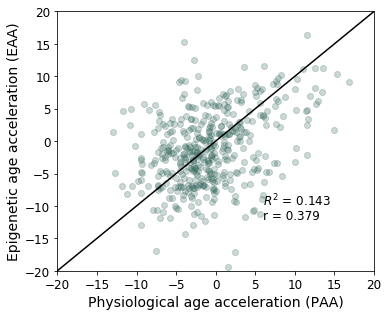

In [8]:
m_PAA = []
phys_PAA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_PAA.append(phys_accel[phys_idx])
        m_PAA.append(m_accel[idx])

pearson, p = pearsonr(m_PAA, phys_PAA)
pl.figure(figsize=(5.5,4.5))
pl.scatter(phys_PAA, m_PAA, color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic age acceleration (EAA)', fontsize=14)
pl.xlabel('Physiological age acceleration (PAA)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-20,20],[-20,20],'k')
pl.xlim(-20,20)
pl.ylim(-20,20)
pl.tight_layout()
pl.savefig('./Figures/DNAm_accel.png', dpi=800)
pl.show()

# Elastic Net Model (inCHIANTI)

In [15]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_en/wave0_inchianti_en.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_en/wave3_inchianti_en.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]

# DNAm data
DNAm_data = np.genfromtxt('InCHIANTI_DNAmAge.csv',delimiter=',')
m_id = DNAm_data[1:,0]
m_age = DNAm_data[1:,2]
m_year = DNAm_data[1:,1]
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 1998:
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 2007:
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)

# Calculate eRAs and PAAs for DNAm
rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_accel = []

for key, value in rate_dict.items():
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))

In [16]:
# Calculate averages for the physiological rates
rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

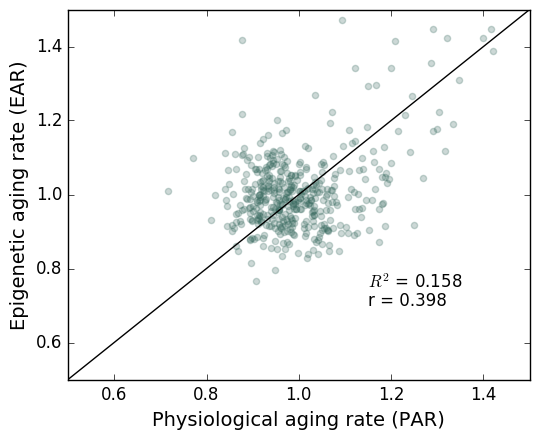

In [17]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5.5,4.5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.5,1.5],[0.5,1.5],'k')
pl.xlim(0.5,1.5)
pl.ylim(0.5,1.5)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_en.png', dpi=800)
pl.show()

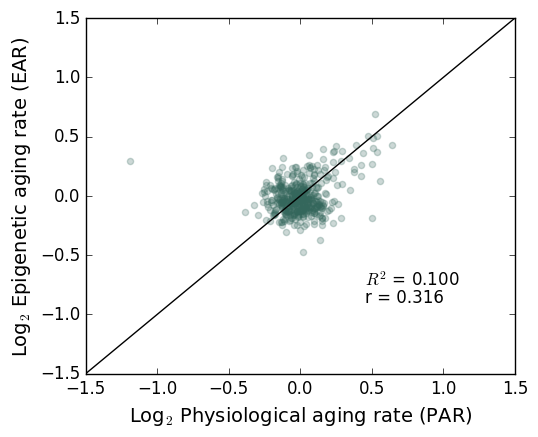

In [20]:
m_eRA = []
phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])

pearson, p = pearsonr(np.log2(m_eRA), np.log2(phys_eRA))
pl.figure(figsize=(5.5,4.5))
pl.scatter(np.log2(phys_eRA),np.log2(m_eRA),color='#34675C',alpha=0.25)
pl.ylabel('Log$_{2}$ Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Log$_{2}$ Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-1.5,1.5],[-1.5,1.5],'k')
pl.xlim(-1.5,1.5)
pl.ylim(-1.5,1.5)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_en_log.png', dpi=800)
pl.show()

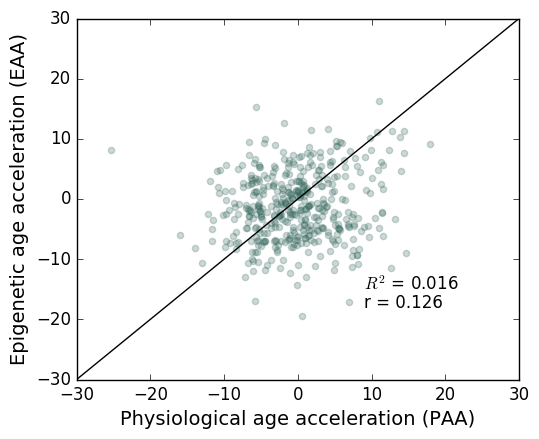

In [24]:
m_PAA = []
phys_PAA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_PAA.append(phys_accel[phys_idx])
        m_PAA.append(m_accel[idx])

pearson, p = pearsonr(m_PAA, phys_PAA)
pl.figure(figsize=(5.5,4.5))
pl.scatter(phys_PAA, m_PAA, color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic age acceleration (EAA)', fontsize=14)
pl.xlabel('Physiological age acceleration (PAA)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-30,30],[-30,30],'k')
pl.xlim(-30,30)
pl.ylim(-30,30)
pl.tight_layout()
pl.savefig('./Figures/DNAm_accel_en.png', dpi=800)
pl.show()

### Correcting for chronological age and sex: correlation of regression residuals

In [5]:
# read in data file for sex-id matching
df = pd.read_csv('RawData/inChiantiAll-w0.tsv', sep='\t')
df_sex = df['Sex']
df_id = df['id_individual']

# get EAR and PAR, chronological ages, and sex
m_eRA = []
phys_eRA = []
chronological = []
sex = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        # append PAR
        phys_eRA.append(phys_rates[phys_idx])
        # append EAR
        m_eRA.append(m_rates[idx])
        # append Age (mean across W0 and W3)
        age_idx_list = [i for i, d in enumerate(list(m_id)) if d==iid]
        try:
            chronological.append((m_age[age_idx_list[0]]+m_age[age_idx_list[1]])/2)
        except:
            chronological.append(m_age[age_idx_list[0]])
        # append Sex
        sex_idx = list(df_id).index(iid)
        sex.append(df_sex[sex_idx])

In [21]:
# run regression models
import statsmodels.api as sm
X = pd.DataFrame(np.vstack((chronological,sex)).T, columns=['age', 'sex'])
X = sm.add_constant(X)
est_EAR = sm.OLS(np.array(m_eRA).T, X)
resEAR = est_EAR.fit()
eEAR = resEAR.predict()
est_PAR = sm.OLS(np.array(phys_eRA).T, X)
resPAR = est_PAR.fit()
ePAR = resPAR.predict()

# get residuals from ols
res_EAR = np.array(m_eRA) - eEAR
res_PAR = np.array(phys_eRA) - ePAR

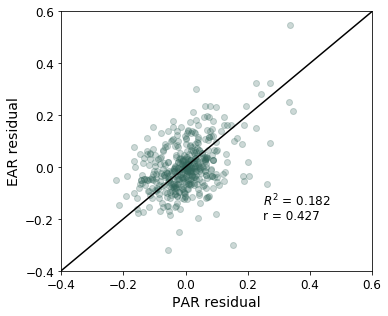

In [27]:
# plot and get correlations of residuals
pearson, p = pearsonr(res_EAR, res_PAR)
pl.figure(figsize=(5.5,4.5))
pl.scatter(res_PAR, res_EAR,color='#34675C',alpha=0.25)
pl.ylabel('EAR residual', fontsize=14)
pl.xlabel('PAR residual',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.25), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([-0.4,0.6],[-0.4,0.6],'k')
pl.xlim(-0.4,0.6)
pl.ylim(-0.4,0.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_RESIDUAL.png', dpi=800)
pl.show()

# GrimAge, PhenoAge, and other DNAm Age scores (with Toshiko's results)

In [2]:
########
FILENAME = 'InChianti_baseline_FollowUp3_DNAm_KDM.csv' # 'InChianti_baseline_FollowUp3_DNAm.csv', 'InChianti_baseline_FollowUp3_DNAm_KDM.csv'
########

In [3]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import csv
import math
from sklearn.linear_model import LinearRegression

### DNAm Age v2

In [10]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['DNAmAge']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

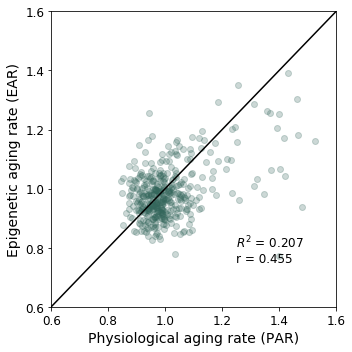

In [11]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic aging rate (EAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.6,1.6],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.6,1.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_NEW.png', dpi=800)
pl.show()

dnam_par2 = m_eRA
dnam_par_res2 = res_m_eRA

### Hannum DNAm Age

In [12]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['DNAmAgeHannum']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

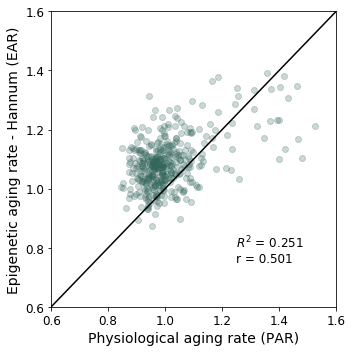

In [13]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Epigenetic aging rate - Hannum (EAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.6,1.6],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.6,1.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_Hannum.png', dpi=800)
pl.show()

hannum_par = m_eRA
hannum_par_res = res_m_eRA

### GrimAge

In [14]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['DNAmGrimAge']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

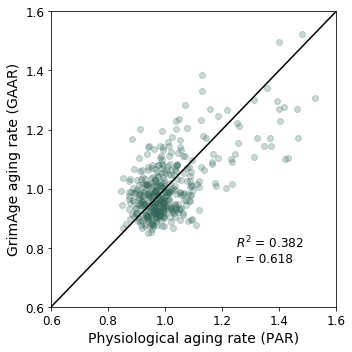

In [15]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('GrimAge aging rate (GAAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.6,1.6],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.6,1.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_GrimAge.png', dpi=800)
pl.show()

grim_par = m_eRA
grim_par_res = res_m_eRA

### PhenoAge

In [16]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['DNAmAgePheno']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

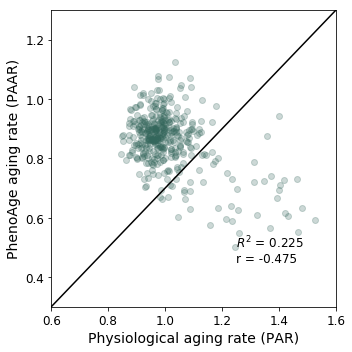

In [17]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('PhenoAge aging rate (PAAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.3,1.3],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.3,1.3)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_PhenoAge.png', dpi=800)
pl.show()

pheno_par = m_eRA
pheno_par_res = res_m_eRA

### DNAm Skin Clock

In [18]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['DNAmAgeSkinClock']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

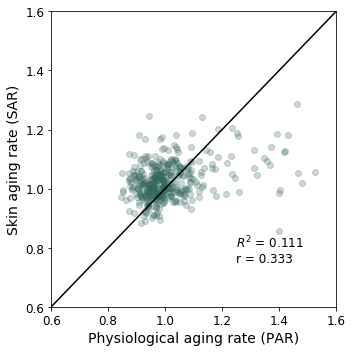

In [19]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('Skin aging rate (SAR)', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.6,1.6],[0.6,1.6],'k')
pl.xlim(0.6,1.6)
pl.ylim(0.6,1.6)
pl.tight_layout()
pl.savefig('./Figures/DNAm_rate_SkinAge.png', dpi=800)
pl.show()

skin_par = m_eRA
skin_par_res = res_m_eRA

### KDM Biological Age

In [20]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['BA']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

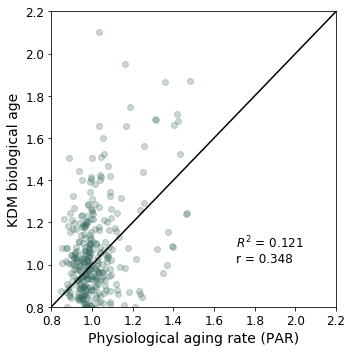

In [21]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('KDM biological age', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.8,2.2],[0.8,2.2],'k')
pl.xlim(0.8,2.2)
pl.ylim(0.8,2.2)
pl.tight_layout()
pl.savefig('./Figures/KDM_rate.png', dpi=800)
pl.show()

kdm_par = m_eRA
kdm_par_res = res_m_eRA

### KDM Biological Age Corrected

In [22]:
# Read in all data and pre-calculated eRA and PAA
w0_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave0_inchianti_rf.tsv',delimiter='\t')
w0_id = w0_data[:,0]
w0_rate = w0_data[:,3]
w0_paa = w0_data[:,2]-w0_data[:,1]
reg0 = LinearRegression().fit(w0_data[:,1].reshape(-1, 1), w0_data[:,2])
w0_res_rate = w0_data[:,2]/reg0.predict(w0_data[:,1].reshape(-1, 1))
w3_data = np.genfromtxt('./Results/inCHIANTI/normal_rf/wave3_inchianti_rf.tsv',delimiter='\t')
w3_id = w3_data[:,0]
w3_rate = w3_data[:,3]
w3_paa = w3_data[:,2]-w3_data[:,1]
reg3 = LinearRegression().fit(w3_data[:,1].reshape(-1, 1), w3_data[:,2])
w3_res_rate = w3_data[:,2]/reg3.predict(w3_data[:,1].reshape(-1, 1))

# DNAm data
DNAm_data = pd.read_csv(FILENAME)
m_id = DNAm_data['subjid']
m_age = DNAm_data['BAC']
m_year = DNAm_data['visit']
m_chrons = []

inCH_w0_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w0.tsv',delimiter='\t')
inCH_w0_ids = inCH_w0_data[1:,0]
inCH_w0_chrons = inCH_w0_data[1:,1]
inCH_w3_data = np.genfromtxt('./RawData/inchianti/inChiantiAll-w3.tsv',delimiter='\t')
inCH_w3_ids = inCH_w3_data[1:,0]
inCH_w3_chrons = inCH_w3_data[1:,1]
for i, mid in enumerate(m_id):
    if m_year[i] == 'baseline':
        idx = np.where(inCH_w0_ids==mid)
        m_chrons.append(inCH_w0_chrons[idx])
    elif m_year[i] == 'fl3':
        idx = np.where(inCH_w3_ids==mid)
        m_chrons.append(inCH_w3_chrons[idx])
    else:
        print (m_year[i])
m_chrons = np.array(m_chrons)


# Linear regression
reg = LinearRegression().fit(np.array(m_chrons).reshape(-1, 1), np.array(m_age))

# Calculate EARS and EAAs for DNAm
rate_dict = {}
res_rate_dict = {}
accel_dict = {}
    
for idx, participant in enumerate(m_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(m_age[idx]/m_chrons[idx])
    pred_pred_age = reg.predict(np.array([m_chrons[idx]]).reshape(-1, 1))[0]
    res_rate_dict[participant].append(m_age[idx]/pred_pred_age)
    accel_dict[participant].append(m_age[idx]-m_chrons[idx])

m_ids = []
m_rates = []
m_res_rates = []
m_accel = []

for key, value in rate_dict.items(): # get average EAR from w0 and w3
    m_ids.append(int(key))
    m_rates.append(np.mean(rate_dict[key]))
    m_res_rates.append(np.mean(res_rate_dict[key]))
    m_accel.append(np.mean(accel_dict[key]))
    
    
# Calculate averages for the physiological rates
rate_dict = {}
res_rate_dict = {}
accel_dict = {}

phys_id = np.concatenate([w0_id,w3_id])
phys_rate = np.concatenate([w0_rate,w3_rate])
phys_res_rate = np.concatenate([w0_res_rate,w3_res_rate])
phys_paa = np.concatenate([w0_paa,w3_paa])
phys_age = np.concatenate([w0_data[:,1],w3_data[:,1]])
for idx, participant in enumerate(phys_id):
    if participant not in rate_dict:
        rate_dict[participant] = []
        accel_dict[participant] = []
        res_rate_dict[participant] = []
    rate_dict[participant].append(phys_rate[idx])
    res_rate_dict[participant].append(phys_res_rate[idx])
    accel_dict[participant].append(phys_paa[idx])

phys_ids = []
phys_rates = []
phys_res_rates = []
phys_accel = []

for key, value in rate_dict.items():
    phys_ids.append(int(key))
    phys_rates.append(np.mean(rate_dict[key]))
    phys_res_rates.append(np.mean(res_rate_dict[key]))
    phys_accel.append(np.mean(accel_dict[key]))

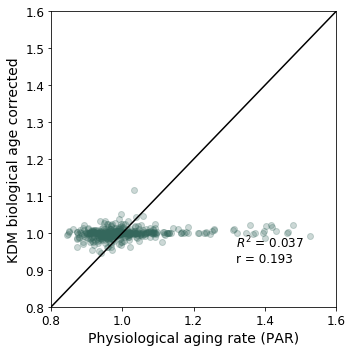

In [24]:
m_eRA = []
res_m_eRA = []
phys_eRA = []
res_phys_eRA = []

for idx, iid in enumerate(m_ids):
    if iid in phys_ids:
        phys_idx = phys_ids.index(iid)
        phys_eRA.append(phys_rates[phys_idx])
        m_eRA.append(m_rates[idx])
        res_phys_eRA.append(phys_res_rates[phys_idx])
        res_m_eRA.append(m_res_rates[idx])

pearson, p = pearsonr(m_eRA, phys_eRA)
pl.figure(figsize=(5,5))
pl.scatter(phys_eRA,m_eRA,color='#34675C',alpha=0.25)
pl.ylabel('KDM biological age corrected', fontsize=14)
pl.xlabel('Physiological aging rate (PAR)',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.plot([0.8,1.6],[0.8,1.6],'k')
pl.xlim(0.8,1.6)
pl.ylim(0.8,1.6)
pl.tight_layout()
pl.savefig('./Figures/KDMc_rate.png', dpi=800)
pl.show()

kdmc_par = m_eRA
kdmc_par_res = res_m_eRA

### Cross-correlations

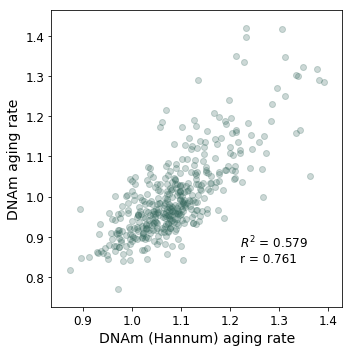

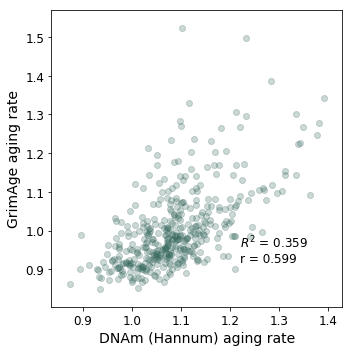

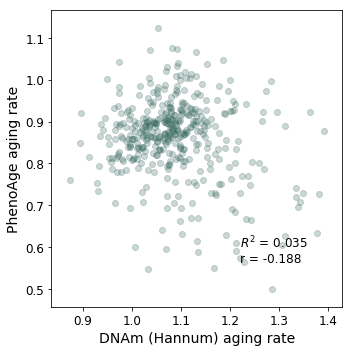

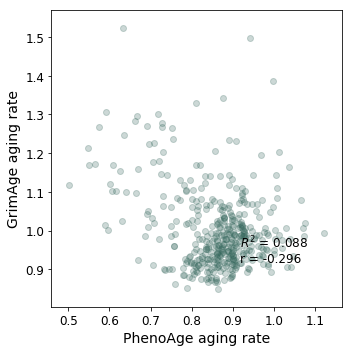

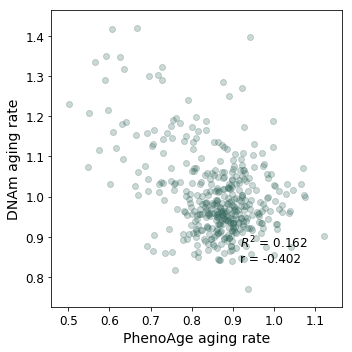

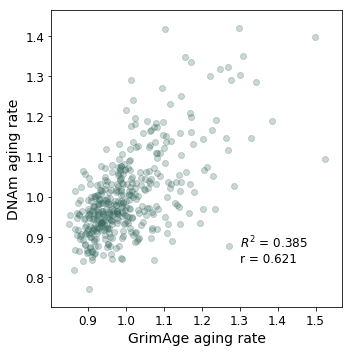

In [45]:
# Hannum vs DNAm Age
pearson, p = pearsonr(hannum_par, dnam_par)
pl.figure(figsize=(5,5))
pl.scatter(hannum_par, dnam_par,color='#34675C',alpha=0.25)
pl.ylabel('DNAm aging rate', fontsize=14)
pl.xlabel('DNAm (Hannum) aging rate',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.show()

# Hannum vs GrimAge
pearson, p = pearsonr(hannum_par, grim_par)
pl.figure(figsize=(5,5))
pl.scatter(hannum_par, grim_par,color='#34675C',alpha=0.25)
pl.ylabel('GrimAge aging rate', fontsize=14)
pl.xlabel('DNAm (Hannum) aging rate',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.show()

# Hannum vs PhenoAge
pearson, p = pearsonr(hannum_par, pheno_par)
pl.figure(figsize=(5,5))
pl.scatter(hannum_par, pheno_par,color='#34675C',alpha=0.25)
pl.ylabel('PhenoAge aging rate', fontsize=14)
pl.xlabel('DNAm (Hannum) aging rate',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.show()

# PhenoAge vs GrimAge
pearson, p = pearsonr(pheno_par, grim_par)
pl.figure(figsize=(5,5))
pl.scatter(pheno_par, grim_par,color='#34675C',alpha=0.25)
pl.ylabel('GrimAge aging rate', fontsize=14)
pl.xlabel('PhenoAge aging rate',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.show()

# PhenoAge vs DNAmAge
pearson, p = pearsonr(pheno_par, dnam_par)
pl.figure(figsize=(5,5))
pl.scatter(pheno_par, dnam_par,color='#34675C',alpha=0.25)
pl.ylabel('DNAm aging rate', fontsize=14)
pl.xlabel('PhenoAge aging rate',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.show()


# GrimAge vs DNAmAge
pearson, p = pearsonr(grim_par, dnam_par)
pl.figure(figsize=(5,5))
pl.scatter(grim_par, dnam_par,color='#34675C',alpha=0.25)
pl.ylabel('DNAm aging rate', fontsize=14)
pl.xlabel('GrimAge aging rate',fontsize=14)
pl.annotate('$R^2$ = '+str("%.3f" %(pearson*pearson)), xy=(0.65, 0.2), xycoords='axes fraction', fontsize=12)
pl.annotate('r = '+str("%.3f" %(pearson)), xy=(0.65, 0.15), xycoords='axes fraction', fontsize=12)
pl.tick_params(axis='both', which='major', labelsize=12)
pl.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.show()

### Residualized comparisons

Instead of Aging Rate = Predicted Age / Chronological Age, it is Aging Rate = Predicted Age / Predicted Predicted Age:

** Only PhenoAge residualized: **

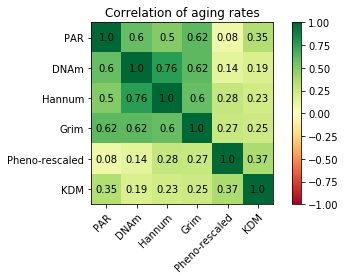

In [57]:
correlation_matrix = np.zeros((6,6))
aging_rate_measures = [phys_eRA,dnam_par,hannum_par,grim_par,pheno_par_res, kdm_par]#,skin_par]
labels = ['PAR', 'DNAm', 'Hannum', 'Grim', 'Pheno-rescaled', 'KDM']#, 'Skin']

for i in range(6):
    for j in range(6):
        pearson, p = pearsonr(aging_rate_measures[i], aging_rate_measures[j])
        correlation_matrix[i,j] = pearson
        
# Make plot
fig, ax = pl.subplots()
im = ax.imshow(correlation_matrix,cmap='RdYlGn',vmin=-1,vmax=1,interpolation='none')
fig.colorbar(im, orientation='vertical')
ax.set_xticks(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(6):
    for j in range(6):
        text = ax.text(j, i, round(correlation_matrix[i, j],2),
                       ha="center", va="center", color="k")
ax.set_title(r"Correlation of aging rates")
fig.tight_layout()
pl.savefig('./Figures/DNAm_correlation_tileplot_phenoOnlyRes.png', dpi=800)
pl.show()

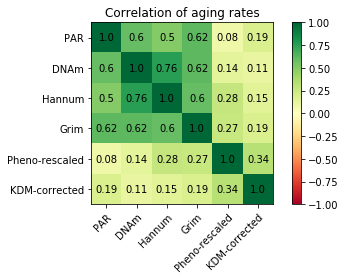

In [25]:
# WITH BAC instead of BA
correlation_matrix = np.zeros((6,6))
aging_rate_measures = [phys_eRA,dnam_par,hannum_par,grim_par,pheno_par_res, kdmc_par]#,skin_par]
labels = ['PAR', 'DNAm', 'Hannum', 'Grim', 'Pheno-rescaled', 'KDM-corrected']#, 'Skin']

for i in range(6):
    for j in range(6):
        pearson, p = pearsonr(aging_rate_measures[i], aging_rate_measures[j])
        correlation_matrix[i,j] = pearson
        
# Make plot
fig, ax = pl.subplots()
im = ax.imshow(correlation_matrix,cmap='RdYlGn',vmin=-1,vmax=1,interpolation='none')
fig.colorbar(im, orientation='vertical')
ax.set_xticks(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(6):
    for j in range(6):
        text = ax.text(j, i, round(correlation_matrix[i, j],2),
                       ha="center", va="center", color="k")
ax.set_title(r"Correlation of aging rates")
fig.tight_layout()
pl.savefig('./Figures/DNAm_correlation_tileplot_phenoOnlyRes_kdmc.png', dpi=800)
pl.show()